<a href="https://colab.research.google.com/github/Sehastrajit-clg/Deep-Learning/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nnUntitled
import torch.nn.functional as F

In [ ]:
df = pd.read_csv('perceptron_sampledata.csv')

In [ ]:
X=df.drop('label',axis=1).values
y=df['label'].values

In [ ]:
X

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.8)

In [ ]:
X_train

tensor([[-0.3300,  1.4400],
        [ 0.8300,  3.9400],
        [ 1.3100,  1.8500],
        [ 0.7700, -1.1400]])

In [ ]:
y_train

tensor([0., 1., 1., 0.])

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [61]:
class AND_Model(nn.Module):
  def __init__(self, input_features=2, hidden1=2, hidden2=2, out_features=2):
    super(AND_Model, self).__init__()
    self.Layer1 = nn.Linear(input_features, hidden1)
    self.Layer2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.tanh(self.Layer1(x))
    y = F.tanh(self.Layer2(x))
    x = self.out(x)
    return x


In [62]:
torch.manual_seed(3)
model= AND_Model()

In [63]:
model.parameters

<bound method Module.parameters of AND_Model(
  (Layer1): Linear(in_features=2, out_features=2, bias=True)
  (Layer2): Linear(in_features=2, out_features=2, bias=True)
  (out): Linear(in_features=2, out_features=2, bias=True)
)>

In [80]:
###backward propagation
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.ASGD(model.parameters(),lr=0.01)

In [81]:
epochs = 200
final_losses = []
for i in range(epochs):
  i = i + 1
  y_pred = model.forward(X_train)
  # Convert y_train to Long data type
  y_train_long = y_train.long()
  loss = loss_function(y_pred, y_train_long)
  final_losses.append(loss.item())
  print("Epochs {} and the loss: {}".format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs 1 and the loss: 0.6459305286407471
Epochs 2 and the loss: 0.645149290561676
Epochs 3 and the loss: 0.6443672180175781
Epochs 4 and the loss: 0.6435844898223877
Epochs 5 and the loss: 0.6428007483482361
Epochs 6 and the loss: 0.6420161724090576
Epochs 7 and the loss: 0.6412308812141418
Epochs 8 and the loss: 0.6404446363449097
Epochs 9 and the loss: 0.6396574378013611
Epochs 10 and the loss: 0.6388694047927856
Epochs 11 and the loss: 0.6380804777145386
Epochs 12 and the loss: 0.6372905969619751
Epochs 13 and the loss: 0.6364997625350952
Epochs 14 and the loss: 0.6357079744338989
Epochs 15 and the loss: 0.6349152326583862
Epochs 16 and the loss: 0.6341215372085571
Epochs 17 and the loss: 0.6333268880844116
Epochs 18 and the loss: 0.6325311660766602
Epochs 19 and the loss: 0.6317344903945923
Epochs 20 and the loss: 0.630936861038208
Epochs 21 and the loss: 0.630138099193573
Epochs 22 and the loss: 0.629338264465332
Epochs 23 and the loss: 0.6285375356674194
Epochs 24 and the loss: 

Text(0.5, 0, 'Epoch')

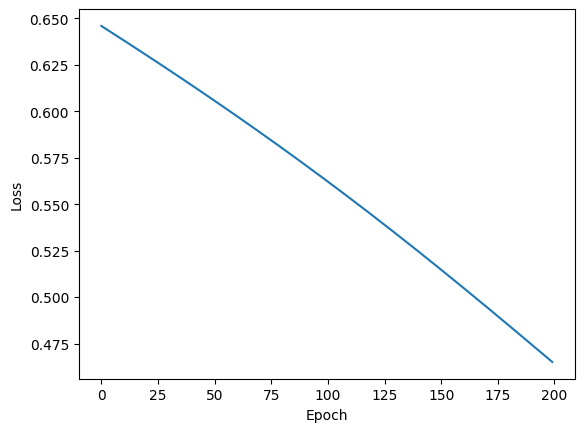

In [82]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
predictions=[]
with torch.no_grad():
  for i,data in enumerate(X_test):
